In [1]:
import sys
import os
sys.path.append("../..")
from diachr.diachromatic_interaction_set import DiachromaticInteractionSet

# Create directory for output files generated in this notebook 
NOTEBOOK_RESULTS_DIR = 'triangle_interaction_maps_results'
%mkdir -p $NOTEBOOK_RESULTS_DIR

## Triangle interaction maps

We used the module `TIMViz` to create the tringle interaction map in which interactions are represented as polygons along the genomic axis. The module is implemented here:

In [2]:
from diachr.TIMViz import TIMViz

How to use this module is demonstrated [here](../usage/triangle_interaction_maps.ipynb).

### Input data

There is capture Hi-C data for 17 cell types. We prepared interaction files with `DICer` and placed them in a local directory structure. If you do not have this directory structure, enter your path to an interaction file at the bottom of the the following cell.

In [3]:
AUTHOR = 'JAV' # MIF or JAV
PROTOCOL = 'CHC' # HC or CHC
CELL_TYPE_SHORT = 'MAC_M0_CHI2' # GM12878, MK, ERY, NEU, MON, MAC_M0, ...
OUT_PREFIX = AUTHOR + '_' + CELL_TYPE_SHORT + '_' + PROTOCOL +'_REPC'
INTERACTION_FILE = '../../DICer_interactions/' + PROTOCOL + '/' + OUT_PREFIX + '_evaluated_and_categorized_interactions.tsv.gz'    

Load the BED file with all regions of baited digests.

In [4]:
BAIT_BED_FILE = '../../additional_files/javierre_2016/javierre_baited_digests_hg38.bed'

Create a `TIMViz` object.

In [5]:
visualizer = TIMViz(i_file=INTERACTION_FILE, b_file=BAIT_BED_FILE, verbose=False)

### Visualize HT configurations of unbalanced interactions

If `color_i_cats=False`, then interactions are colored according to their HT configurations. The colors were assigned as follows:

```
'01': 'pink',
'02': 'red',
'03': 'lime',
'12': 'magenta',
'13': 'blue',
'23': 'turquoise'
```

### Separat triangle interaction maps for the enrichment states `NE` and `EN`

We generate triangle interaction maps for the following region:

In [6]:
chrom = 'chr1'
begin = 23000000
end = 25000000
pdf_file_name_prefix = NOTEBOOK_RESULTS_DIR + '/' + 'TIMviz_ht_conf_' + chrom + ':' + str(begin) + '-' + str(end)

For the selcted region, we generate four triangle interaction maps, one for each enrichment status (`NE` and `EN`) and each of the interaction categories unbalanced (`DIX` and `DI`) and balanced (`UIR` and `UI`).

Creating plots for: chr1:23000000-25000000
	e_cat: NE
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']
	e_cat: EN
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']


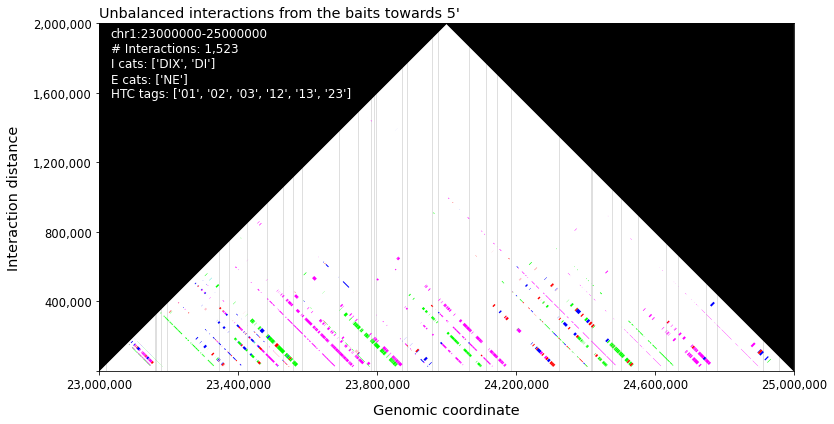

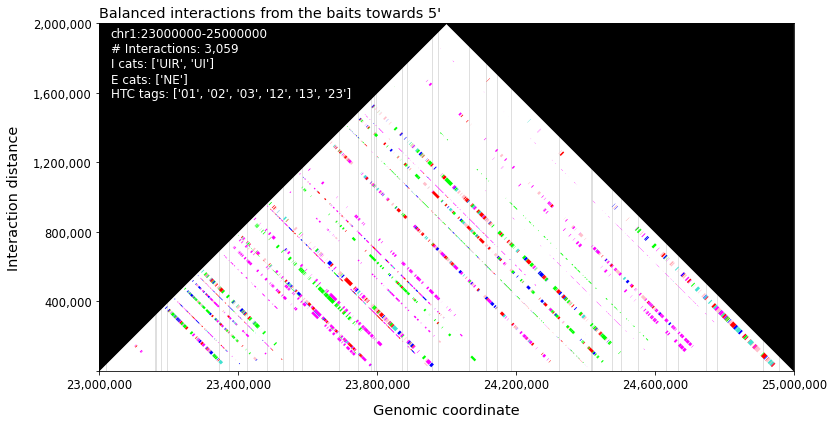

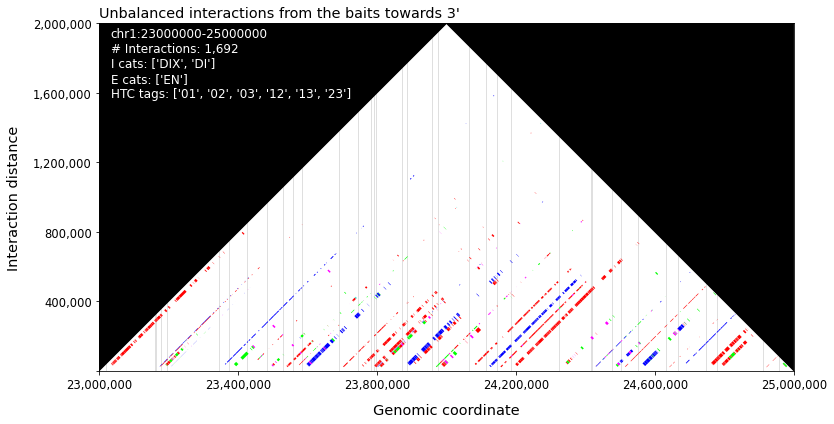

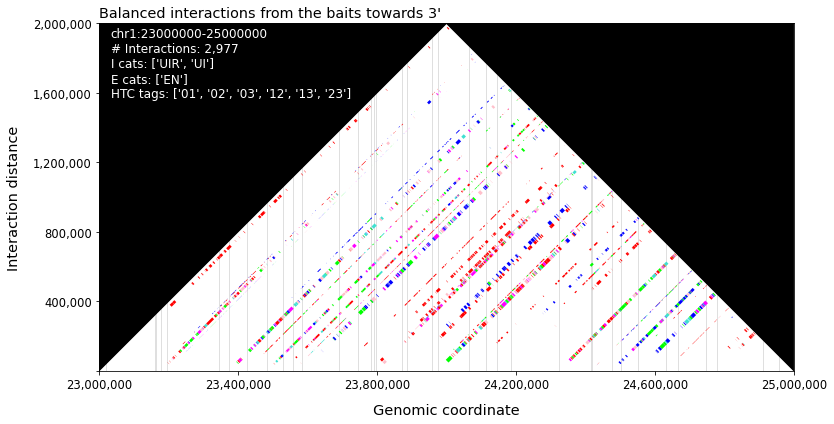

In [7]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for e_cat in ['NE', 'EN']:
    print("\te_cat: " + e_cat)
    for i_cat_list in [['DIX', 'DI'], ['UIR', 'UI']]:
        print("\t\ti_cat_list: " + str(i_cat_list))
        if i_cat_list == ['DIX', 'DI']:
            plot_title = 'Unbalanced interactions'
        if i_cat_list == ['UIR', 'UI']:
            plot_title = 'Balanced interactions'
        if e_cat == 'NE':
            plot_title = plot_title + ' from the baits towards 5\''
        if e_cat == 'EN':
            plot_title = plot_title + ' from the baits towards 3\''
        TIMviz_plot = visualizer.create_visualization(chrom = chrom,
                                        begin = begin,
                                        end = end,
                                        inter_cat_list = i_cat_list,
                                        enr_cat_list = [e_cat],
                                        color_i_cats=False,
                                        pp_linewidth=0,
                                        transparent_polygons=False,           
                                        plot_title = plot_title,
                                        pdf_file_name = pdf_file_name_prefix + '_' + e_cat + '_' + str(i_cat_list).replace(" ", "")  + '.pdf',
                                        verbose=False)

### Triangle interaction maps for a smaller region and not separated for `NE` and `EN`

In [8]:
chrom = 'chr1'
begin = 23600000
end = 24400000
pdf_file_name_prefix = NOTEBOOK_RESULTS_DIR + '/' + 'TIMviz_ht_conf_' + chrom + ':' + str(begin) + '-' + str(end)

Creating plots for: chr1:23600000-24400000
		i_cat_list: ['DIX', 'DI']
		i_cat_list: ['UIR', 'UI']


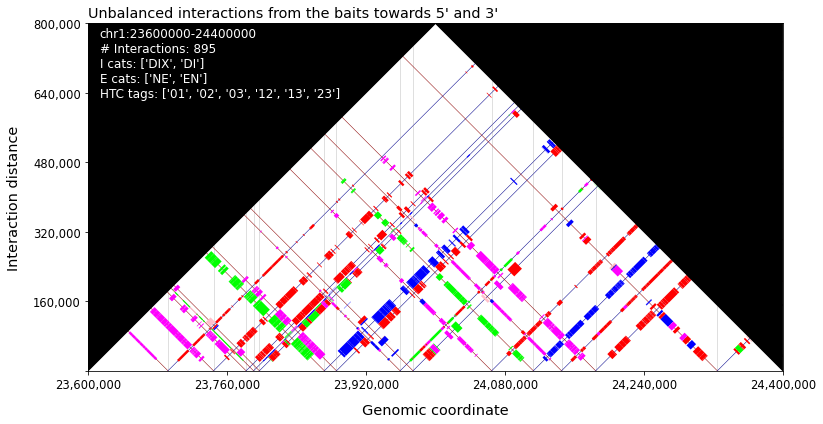

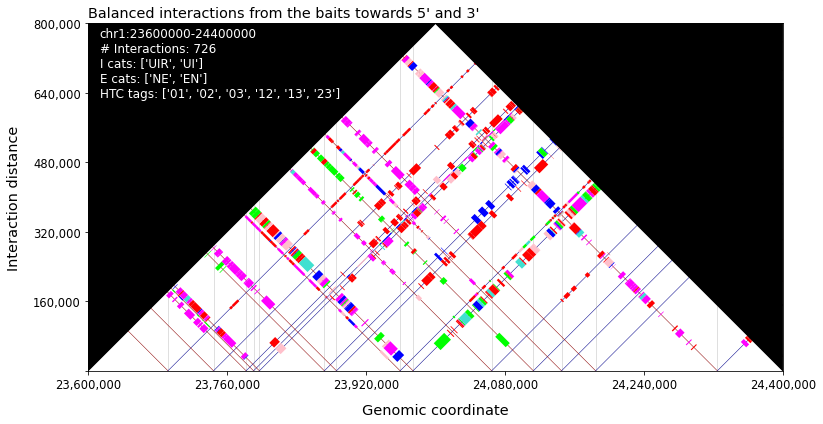

In [9]:
print('Creating plots for: ' + chrom + ':' + str(begin) + '-' + str(end))
for i_cat_list in [['DIX', 'DI'], ['UIR', 'UI']]:
    print("\t\ti_cat_list: " + str(i_cat_list))
    if i_cat_list == ['DIX', 'DI']:
        plot_title = 'Unbalanced interactions'
    if i_cat_list == ['UIR', 'UI']:
        plot_title = 'Balanced interactions'
    plot_title = plot_title + ' from the baits towards 5\' and 3\''
    TIMviz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = i_cat_list,
                                    enr_cat_list = ['NE','EN'],
                                    color_i_cats=False,
                                    pp_linewidth=0,
                                    plot_bait_diagonals=True,
                                    transparent_polygons=False,           
                                    plot_title = plot_title,
                                    pdf_file_name = pdf_file_name_prefix + '_' + str(i_cat_list).replace(" ", "") + '.pdf',
                                    verbose=False)

### Slide a window along the genome

Creating plot for: chr15:89964732-90964732
Creating plot for: chr15:90464732-91464732
Creating plot for: chr15:90964732-91964732
Creating plot for: chr15:91464732-92464732
Creating plot for: chr15:91964732-92964732
Creating plot for: chr15:92464732-93464732


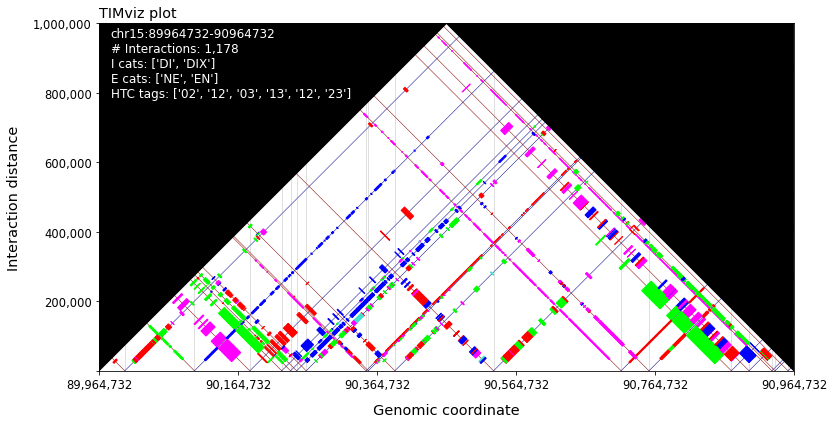

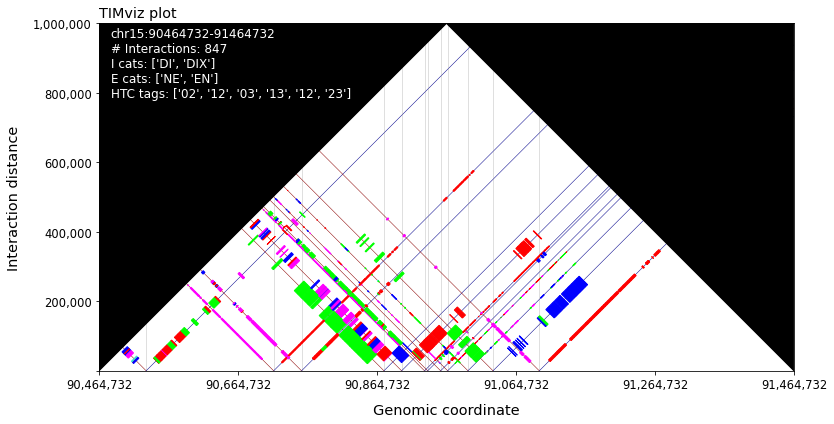

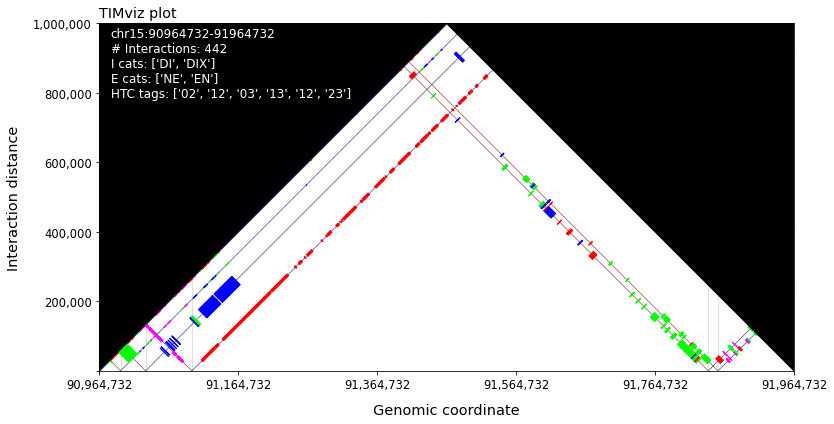

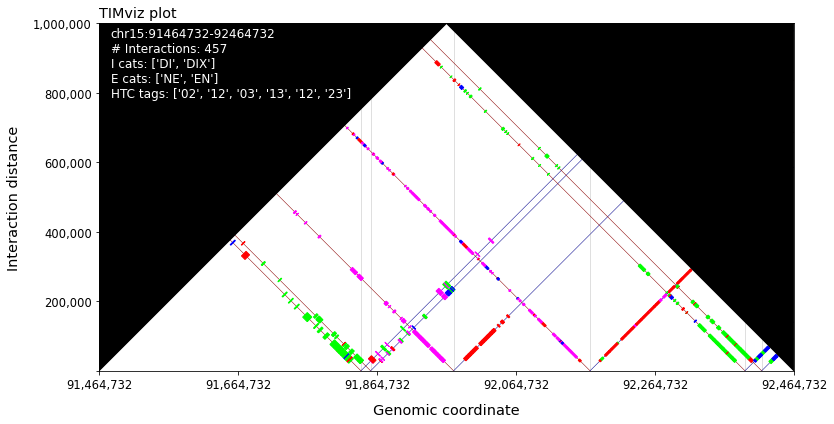

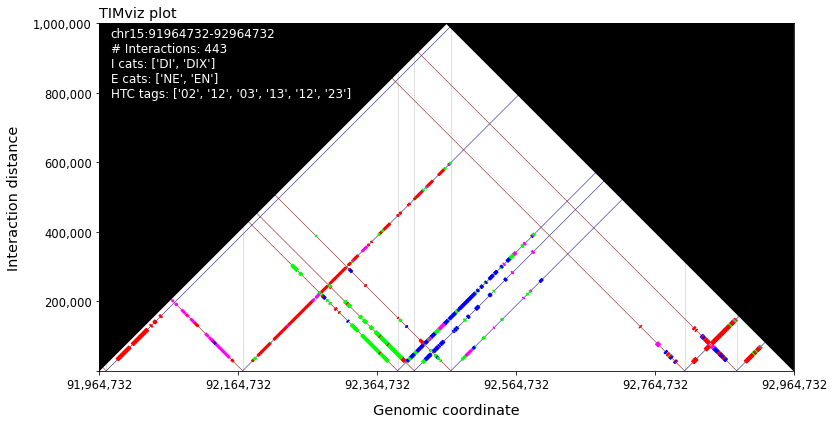

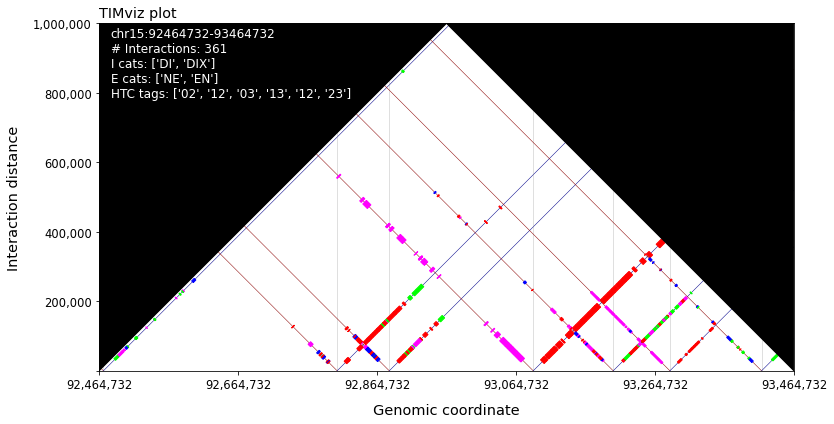

In [10]:
chrom = 'chr15'
from_pos = 90464732-500000
to_pos = from_pos + 3000000
window_size = 1000000
shift_size = int(window_size/2)
for start_pos in range(from_pos, to_pos, shift_size):
    begin = start_pos
    end = begin + window_size
    print('Creating plot for: ' + chrom + ':' + str(begin) + '-' + str(end))
    TIMviz_plot = visualizer.create_visualization(chrom = chrom,
                                    begin = begin,
                                    end = end,
                                    inter_cat_list = ['DI', 'DIX'],
                                    enr_cat_list = ['NE','EN'],
                                    ht_tag_list = ['02','12','03','13','12','23'],
                                    plot_bait_diagonals=True,
                                    transparent_polygons=False, 
                                    color_i_cats=False,
                                    verbose=False)